<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [106]:
X = df.drop(['price'], axis = 1)
y = df['price']
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (8495, 8)
y.shape: (8495,)


## 1.2 Split the data into test and train datasets using train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(
                                    X.values, 
                                    y.values,
                                    test_size = 0.25)
print('x_train:\n', x_train)
print('x_test:\n', x_test)
print('y_train:\n', y_train)
print('y_test:\n', y_test)

x_train:
 [[5.600e+01 5.000e+00 2.450e+02 ... 1.000e+00 2.007e+03 0.000e+00]
 [5.900e+01 5.000e+00 2.500e+02 ... 1.000e+00 2.006e+03 0.000e+00]
 [7.600e+01 3.000e+00 6.500e+01 ... 1.000e+00 2.014e+03 0.000e+00]
 ...
 [5.900e+01 1.000e+00 3.150e+02 ... 0.000e+00 2.003e+03 0.000e+00]
 [4.200e+01 0.000e+00 1.200e+02 ... 1.000e+00 2.012e+03 1.000e+00]
 [4.000e+00 3.000e+00 2.600e+02 ... 0.000e+00 2.000e+03 1.000e+00]]
x_test:
 [[4.000e+00 4.000e+00 3.160e+02 ... 1.000e+00 1.997e+03 1.000e+00]
 [6.700e+01 4.000e+00 2.200e+02 ... 1.000e+00 2.004e+03 0.000e+00]
 [7.700e+01 1.000e+00 2.500e+02 ... 0.000e+00 2.000e+03 0.000e+00]
 ...
 [1.200e+01 5.000e+00 1.000e+00 ... 1.000e+00 2.014e+03 1.000e+00]
 [2.300e+01 3.000e+00 1.030e+02 ... 1.000e+00 2.010e+03 0.000e+00]
 [7.700e+01 4.000e+00 1.490e+02 ... 1.000e+00 2.013e+03 0.000e+00]]
y_train:
 [ 5700.  8800.  6700. ...  2850. 39900.  4000.]
y_test:
 [ 6200.  5400.  3500. ... 94400. 10400. 16800.]


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
model = LinearRegression()
reg = model.fit(x_train, y_train)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [109]:
cols = X.columns
print('Coefficients:')
for i in range(len(cols)):
  print('{:>20}: {: f}'.format(cols[i], reg.coef_[i]))

print('Intercept:\n', reg.intercept_)

Coefficients:
                make: -35.124567
                body: -1854.179683
             mileage: -45.167246
                engV:  236.054815
             engType: -1274.957998
        registration:  4193.167276
                year:  1142.405162
               drive:  8610.215550
Intercept:
 -2271195.683822916


## 1.5 Use the test data to make predictions

In [0]:
y_test_predicted = model.predict(x_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [111]:
MSE = mean_squared_error(y_test, y_test_predicted)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_test_predicted)

print('RMSE:', RMSE)
print('r2:', r2)

RMSE: 19207.044687386522
r2: 0.2984693631418709


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

### The coefficient corresponding to the 'year' feature is a positive number.  This means that as year increases, the price of the car increases.  This is probably because a larger year means it is a newer car.

## 1.8 How should we interpret the Root-Mean-Square Error?

### Root-Mean-Square Error (RMSE) is a measure of all the sum of all the differences between the linear fit plane and each data point. A larger RMSE implies a looser fit.  A smaller RMSE is a tighter fit.

## 1.9 How should we interpret the $R^2$?

### The $R^2$ value gives us a closeness of fit for the linear regression to the data.  It usually goes from 0 to 1, with 1 being the best fit.  It could go negative if the model predicting the fit is really bad.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [112]:
df['ln_price'] = np.log(df['price'])
df = df.drop(['price'], axis = 1)
df.head(5)

,make,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,0,68,2.5,1,1,2010,1,9.648595
1,50,3,173,1.8,1,1,2011,2,9.928180
2,50,2,135,5.5,3,1,2008,2,10.463103
3,50,5,162,1.8,0,1,2012,0,9.786954
4,55,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

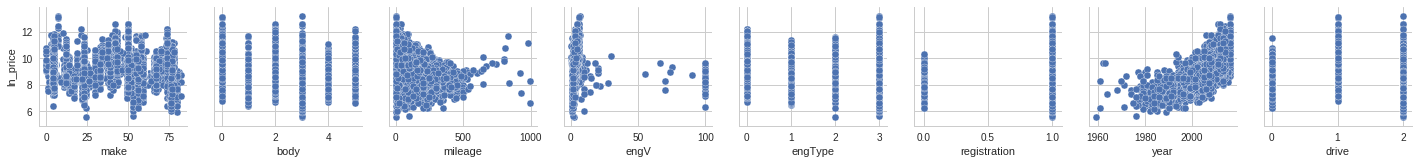

In [113]:
sns.pairplot(data = df, y_vars = ['ln_price'],
             x_vars = df.drop(['ln_price'], axis = 1).columns);

## 2.3 If appropriate, create any polynomial features. 

### We have to remember that some parameters, though shown as numerical here, are not really ordinal.
These parameters are not ordinal:
  - make
  - body
  - registration
  - drive (since there are 3 values, it could not be 2-wheel/4-wheel, more like front-wheel, rear-wheel, all-wheel)

engV is probably engine volume, so ordinal.
Maybe engType is ordinal - looks like it is number of cylinders in the car engine.

So these are the parameters we can get polynomials for:
  - mileage
  - engV
  - year
  
It looks like we should get log(mileage), and log(year) instead.

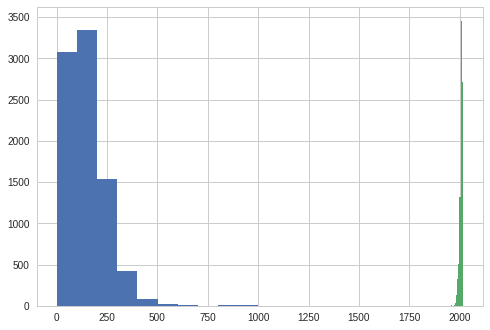

In [128]:
df['mileage'].hist();
df['year'].hist();

In [0]:
# Since some mileage are zero, replace them with 1 so log(1) = 0
df['mileage'] = df['mileage'] + 1

In [0]:
df['ln_mileage'] = np.log(df['mileage'])
df['ln_year']    = np.log(df['year'])

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [117]:
def find_mse_r2(df, y_col_name):
  X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(y_col_name, axis = 1),
                      df[y_col_name],
                      test_size = 0.25)
  
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  R2 = r2_score(y_test, y_pred)
  
  print('Intercept:\n', reg.intercept_)

  cols = X_train.columns
  print('Coefficients:')
  for i in range(len(cols)):
    print('{:>20}: {: f}'.format(cols[i], reg.coef_[i]))

  print('RMSE:', RMSE, '\nR2:', R2)

find_mse_r2(df, 'ln_price')

Intercept:
 73138.16212685956
Coefficients:
                make: -0.001834
                body: -0.097079
             mileage:  0.001131
                engV:  0.006367
             engType: -0.049967
        registration:  0.677077
                year:  5.649031
               drive:  0.376576
          ln_mileage: -0.059203
             ln_year: -11107.648196
RMSE: 0.5391729424158784 
R2: 0.6697964192637051


### Compared to our earlier model, this log-polynomial model has a larger R2 and a lower RMSE.
Earlier values:
  - RMSE: 19207.044687386522
  - r2: 0.2984693631418709

New values:
  - RMSE: 0.5391729424158784 
  - R2:       0.6697964192637051
  
Maybe a large portion of this change is due to us taking log(y).  This changes the scale on y, and thus gives lower RMSE.

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

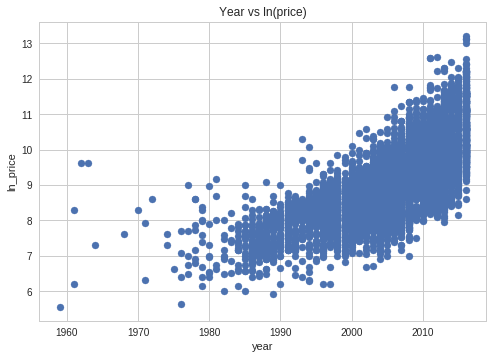

In [118]:
plt.scatter(df['year'], df['ln_price']);
plt.title('Year vs ln(price)')
plt.xlabel('year')
plt.ylabel('ln_price')
plt.show();

### The coefficient of year is a small negative number.  When we look at the above plot though, we can see that this number should be a positive value.  But we should also consider that the regression is trying to fit all variables at once.  It looks like the best way it could do that is by giving less importance to the year and more importance to some other variables.  This is why the year coefficient is negative.  A small negative number is almost like a horizontal line through these points.  It will create errors, but maybe larger errors on other features decreased because of this.


# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

### Gradient descent seeks to minimize the cost function.  The cost value is the value at each point minus the regression fit curve we have now.  This cost value can be positive or negative.  It is squared to make sure these positive and negative values do not cancel out, and summed to get the final cost function value.  This value represents the cost at the current $\theta_0, \theta_1, ..., \theta_n$ parameters of our regression function.

## 3.2 What is the "Learning Rate" and what is its function?

### The Learning Rate is a parameter provided to Gradient Descent.  It is the step size that the algorithm should move in the direction of the negative value of the slope at this point of the regression function.  The movement is in terms of the regression function parameters ($\theta_0, \theta_1,...,\theta_n$).  After the move to a different $\theta_0, \theta_1,...,\theta_n$, the cost value at this point is evaluated again.

### If the Learning Rate is too large, we will land on the other side of the cost function parabola (assuming it is a parabola).  If we land on a point that has a higher cost value, each further jump will take us in the direction of increasing cost value - which is not what we want.  This will cause the algorithm to not converge.

### If the Learning Rate is too small, we will keep going in the direction of lower cost values, but it will take a long time to get to zero cost (or close to it).

### Note to self: According to Andrew Ng, he always plots the cost function over iterations to see how it is doing.  This tells him if it's working as required.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

### Let's look at our data first.  

### Note to self: If given a choice of log-linear or log-polynomial, and the dataset is not big, I will go with log-polynomial as it includes log-linear components.

In [119]:
df.head(5)

,make,body,mileage,engV,engType,registration,year,drive,ln_price,ln_mileage,ln_year
0,23,0,69,2.5,1,1,2010,1,9.648595,4.234107,7.605890
1,50,3,174,1.8,1,1,2011,2,9.928180,5.159055,7.606387
2,50,2,136,5.5,3,1,2008,2,10.463103,4.912655,7.604894
3,50,5,163,1.8,0,1,2012,0,9.786954,5.093750,7.606885
4,55,0,84,2.0,3,1,2013,1,9.717158,4.430817,7.607381


In [120]:
df.dtypes

make              int64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
ln_price        float64
ln_mileage      float64
ln_year         float64
dtype: object

In [121]:
df.isnull().sum().sum()

0

### Excellent - we have only numerical parameters, and we don't have any missing values.
### Check for outliers

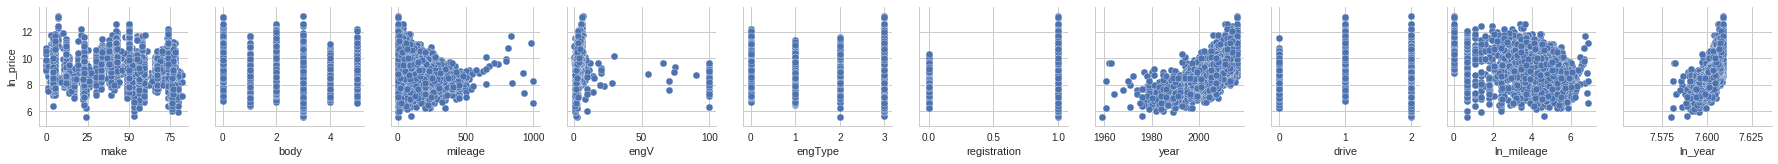

In [122]:
sns.pairplot(data = df, y_vars = ['ln_price'],
             x_vars = df.drop(['ln_price'], axis = 1).columns);

### I don't see any outliers

### There is some heteroskedacticity in engV and mileage. Robust Standard Errors should get around that.

In [123]:
X = df.drop(['ln_price'], axis = 1).copy()
X = sm.add_constant(X)

y = df[['ln_price']]

model = sm.OLS(y, X).fit(cov_type = 'HC3')
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1766.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:40:05   Log-Likelihood:                -6926.1
No. Observations:                8495   AIC:                         1.387e+04
Df Residuals:                    8484   BIC:                         1.395e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.205e+04   9124.067      7.896   

### The last line of the regression results says that we may have multicollinearity problems since the Condition Number is large.  Let's use VIF to figure it out.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [124]:
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
cols = X.columns
print('VIF:')
for i in range(len(cols)):
  print('{:>20}: {: f}'.format(cols[i], vif[i]))

VIF:
               const:  589013814722.795654
                make:  1.060426
                body:  1.159226
             mileage:  3.019827
                engV:  1.010056
             engType:  1.156198
        registration:  1.114097
                year:  162165.590357
               drive:  1.146056
          ln_mileage:  2.775334
             ln_year:  161881.593514


### Let's look at residual plots (just to see how residual errors look like)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


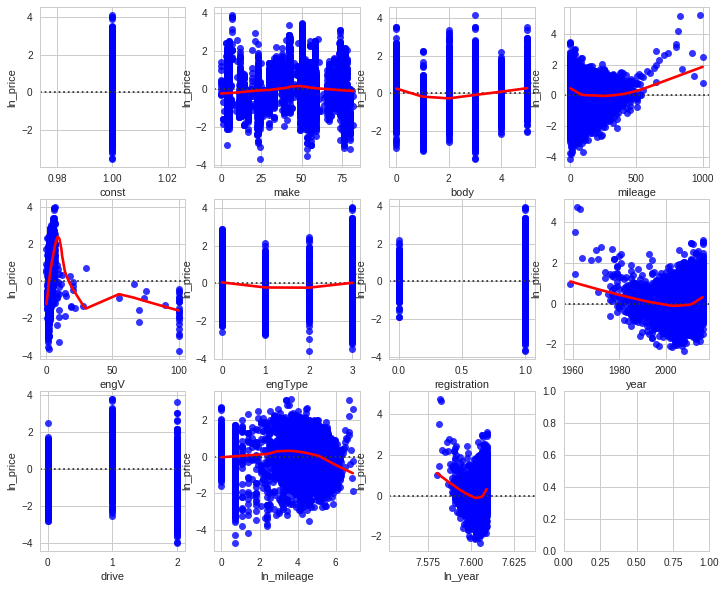

In [125]:
sns.set_style('whitegrid');
fig, ax = plt.subplots(3, 4, figsize = (12, 10));

def display_residual_plot(X, x_name, y, y_name, ax):
  sns.residplot(X[x_name], y[y_name], lowess = True, color = 'r', 
                ax = ax, scatter_kws = {'color': 'blue'});

cols = X.columns
for i in range(len(cols)):
  row_num = i // 4
  col_num = i % 4
  display_residual_plot(X, cols[i], y, 'ln_price', ax[row_num][col_num])

### Looks like there are some variables whose VIF > 10.  We should drop them and run Robust Standard Error regression again:
  - year
  - ln_year

In [126]:
X = X.drop(['year', 'ln_year'], axis = 1)

model = sm.OLS(y, X).fit(cov_type = 'HC3')
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     661.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:40:09   Log-Likelihood:                -9907.4
No. Observations:                8495   AIC:                         1.983e+04
Df Residuals:                    8486   BIC:                         1.990e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.6218      0.060    161.299   

### Our Condition Number has improved by 6 orders of magnitude, $R^2$ has gone down a lot (from 0.67 -> 0.35). Our standard errors improved somewhat.  Our p-values are all zeros, except for one which is 0.012 (so they're still all significant).

### Let's do a residual plot to see how our residuals look

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


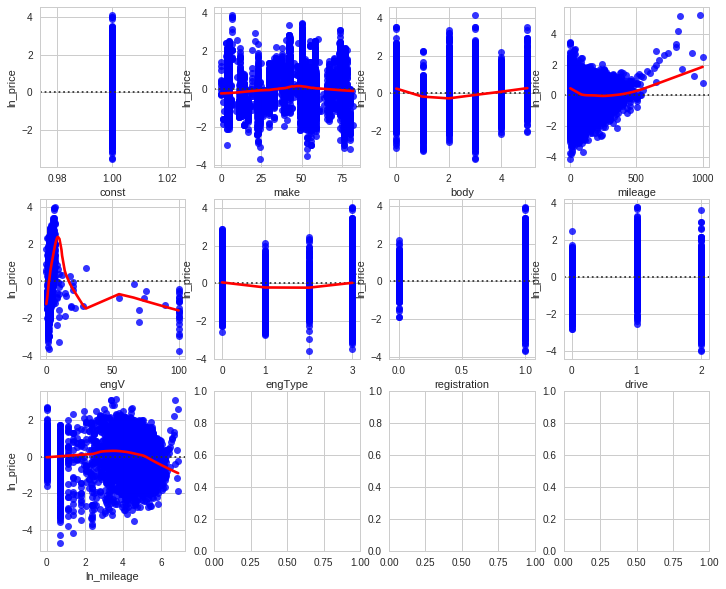

In [127]:
sns.set_style('whitegrid');
fig, ax = plt.subplots(3, 4, figsize = (12, 10));

def display_residual_plot(X, x_name, y, y_name, ax):
  sns.residplot(X[x_name], y[y_name], lowess = True, color = 'r', 
                ax = ax, scatter_kws = {'color': 'blue'});

cols = X.columns
for i in range(len(cols)):
  row_num = i // 4
  col_num = i % 4
  display_residual_plot(X, cols[i], y, 'ln_price', ax[row_num][col_num])

### Our residuals are still bad.  Not sure what other changes to do to get these residuals better.